<a href="https://colab.research.google.com/github/hyyy11/colab0000/blob/main/11%EC%9D%BC%EC%B0%A8_0327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 7s 0us/step
Image size: (32, 32, 3)


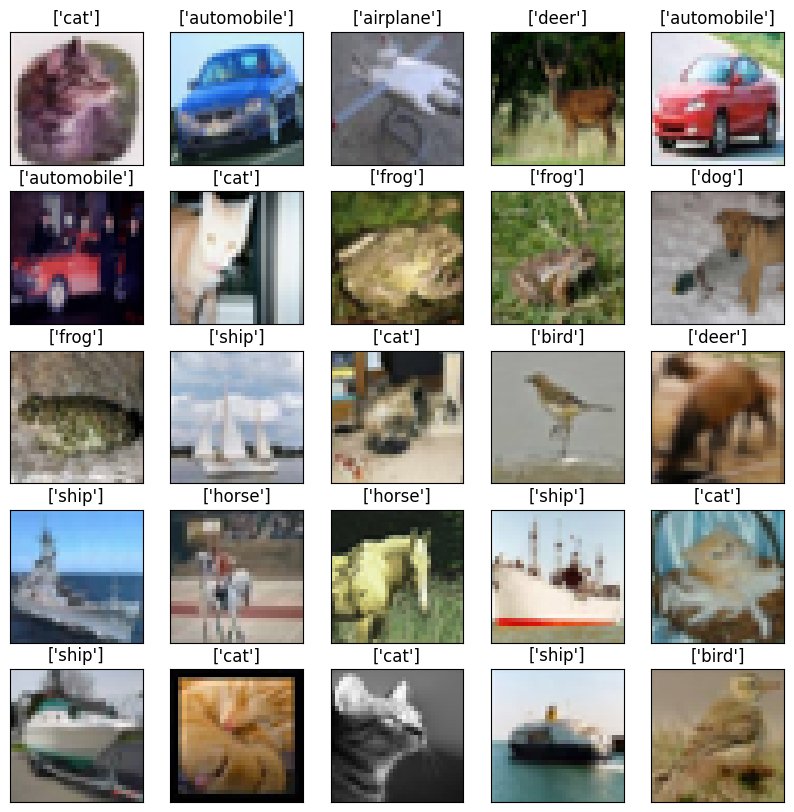

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print("Image size:", x_train[0].shape)


cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])


n_image = 25    #이미지 표시 수
rand_idx = np.random.randint(0, len(x_train), n_image)


plt.figure(figsize=(10,10))      #표시 영역 크기
for i in range(n_image):
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_idx[i]])
    label = cifar10_labels[t_train[rand_idx[i]]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)          #라벨과 메모리를 비표시로


plt.show()

In [ ]:
batch_size = 32   #배치 크기
epochs = 20   #에포크 수
n_class = 10   #10의 클래스로 분류


#one-hot 표현으로 변환
t_train = tf.keras.utils.to_categorical(t_train, n_class)   #one-hot 표현으로 변환
t_test = tf.keras.utils.to_categorical(t_test, n_class)
print(t_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=x_train.shape[1:]))       #배치 크기 이외의 입력 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())      #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))   #드롭아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))

#최적화 알고리즘에 Adam, 손실함수에 교차 엔트로피를 지정해서 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

In [ ]:
x_train = x_train / 255    #0에서 1의 범위에 넣는다
x_test = x_test / 255

#훈련 데이터를 사용해 모델을 훈련한다
history = model.fit(x_train, t_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 21s 7ms/step - loss: 1.5172 - accuracy: 0.4506 - val_loss: 1.1314 - val_accuracy: 0.5968
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0757 - accuracy: 0.6214 - val_loss: 0.9298 - val_accuracy: 0.6756
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9027 - accuracy: 0.6819 - val_loss: 0.8070 - val_accuracy: 0.7178
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7997 - accuracy: 0.7214 - val_loss: 0.8200 - val_accuracy: 0.7206
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7233 - accuracy: 0.7469 - val_loss: 0.7849 - val_accuracy: 0.7330
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6641 - accuracy: 0.7653 - val_loss: 0.7344 - val_accuracy: 0.7515
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6032 - accuracy: 0.7847 - val_loss: 0.7597 - val_ac

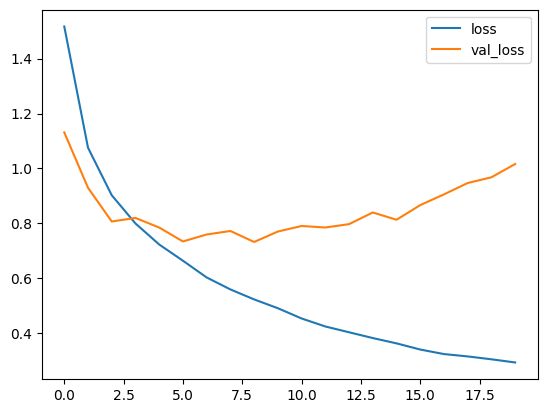

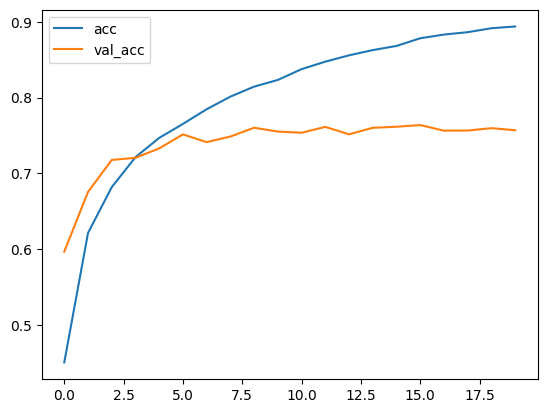

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']         #훈련용 데이터의 오차
train_acc = history.history['accuracy']      #훈련용 데이터의 정밀도
val_loss = history.history['val_loss']       #검증용 데이터의 정밀도
val_acc = history.history['val_accuracy']    #검증용 데이터의 정밀도


#오차 표시
plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()


#정밀도 표시
plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()